In [1]:
import anndata as ad
import numpy as np
import pandas as pd

In [2]:
import scanpy as sc

In [1]:
from scanpro import scanpro, anova, t_test
from scanpro.linear_model import create_design
from scanpro.get_transformed_props import get_transformed_props

In [2]:
import matplotlib.pyplot as plt

In [7]:
data_path = "/rds/general/user/tf424/home/97/pmc_91_PD_HC.h5ad"

In [ ]:
adata_filtered = sc.read("/rds/general/user/tf424/home/97/pmc_91_PD_HC.h5ad")

In [36]:
out = scanpro(
    adata_filtered,
    clusters_col="cell_type",
    samples_col="participant_id",
    conds_col="diagnosis",
    transform="logit"
)
out.results

[INFO] There are 2 conditions. T-Test will be performed...
[INFO] Done!


,baseline_props,mean_props_PD,mean_props_HC,prop_ratio,t_statistics,p_values,adjusted_p_values
clusters,,,,,,,
DMNX_Neu,0.000365,0.000307,0.000549,0.559406,-1.768843,0.080401,0.241202
GPI_Neu,0.000130,0.000147,0.000029,5.131013,1.492592,0.139137,0.333928
EN,0.165468,0.147409,0.195776,0.752947,-2.385476,0.019212,0.230545
IN,0.105881,0.102474,0.116049,0.883023,-1.205811,0.231137,0.462274
Astro,0.123559,0.142998,0.124271,1.150695,0.752556,0.453734,0.746581
OPC,0.051650,0.065973,0.059743,1.104273,0.081659,0.935104,0.935104
Oligo,0.494128,0.477271,0.449570,1.061617,0.494557,0.622151,0.746581
Micro_PVM,0.045085,0.047857,0.036139,1.324254,1.781735,0.078258,0.241202
Adaptive,0.000661,0.000650,0.001040,0.625447,-1.935811,0.056116,0.241202


In [37]:
out.results.to_csv("scanpro_results.csv", index=False)

In [22]:
from statsmodels.stats.multitest import multipletests

raw_p = out.results["p_values"].values
adjusted = multipletests(raw_p, method="fdr_bh")[1]
adjusted


array([0.73868035, 0.73868035, 0.73868035, 0.73868035, 0.73868035,
       0.73868035, 0.73868035, 0.73868035, 0.73868035, 0.73868035,
       0.73868035, 0.73868035])

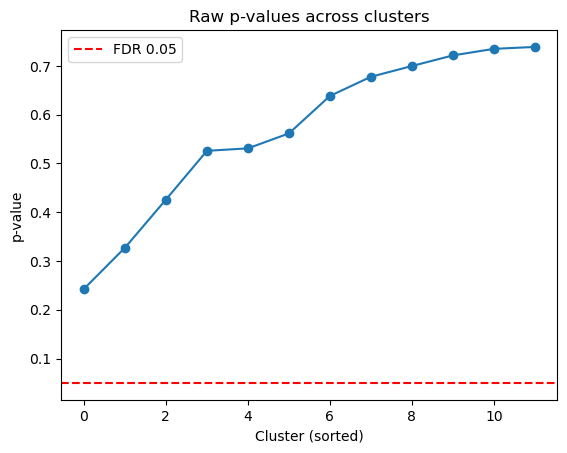

In [23]:
raw_p = out.results["p_values"]
plt.plot(sorted(raw_p), marker="o")
plt.axhline(0.05, color="red", linestyle="--", label="FDR 0.05")
plt.title("Raw p-values across clusters")
plt.ylabel("p-value")
plt.xlabel("Cluster (sorted)")
plt.legend()
plt.show()

In [32]:
out.props

cell_type,DMNX_Neu,GPI_Neu,EN,IN,Astro,OPC,Oligo,Micro_PVM,Adaptive,Mural,Endo,Ependymal
participant_id,,,,,,,,,,,,
PM-HA_S00447,0.000000,0.0,0.048491,0.047414,0.226293,0.366379,0.136853,0.093750,0.001078,0.064655,0.015086,0.000000
PM-HA_S00781,0.000340,0.0,0.120353,0.071465,0.121711,0.060261,0.589883,0.030216,0.000000,0.003395,0.002207,0.000170
PM-HA_S01646,0.000470,0.0,0.058741,0.154370,0.208412,0.043468,0.467105,0.055921,0.000117,0.008224,0.003172,0.000000
PM-HA_S01667,0.000958,0.0,0.284209,0.232656,0.119778,0.049444,0.300307,0.007474,0.000575,0.003833,0.000767,0.000000
PM-HA_S02252,0.000130,0.0,0.234018,0.086538,0.127729,0.036642,0.488825,0.014033,0.000650,0.006237,0.005198,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
PM-UM_HCTYE,0.000664,0.0,0.175083,0.176080,0.165781,0.042857,0.425914,0.006977,0.000332,0.004651,0.001661,0.000000
PM-UM_HCTZZL,0.000631,0.0,0.114778,0.055707,0.106370,0.038890,0.640530,0.036788,0.000841,0.004204,0.001261,0.000000
PM-UM_HCTZZM,0.000342,0.0,0.215443,0.115420,0.109945,0.038891,0.445712,0.066948,0.000570,0.003878,0.002851,0.000000


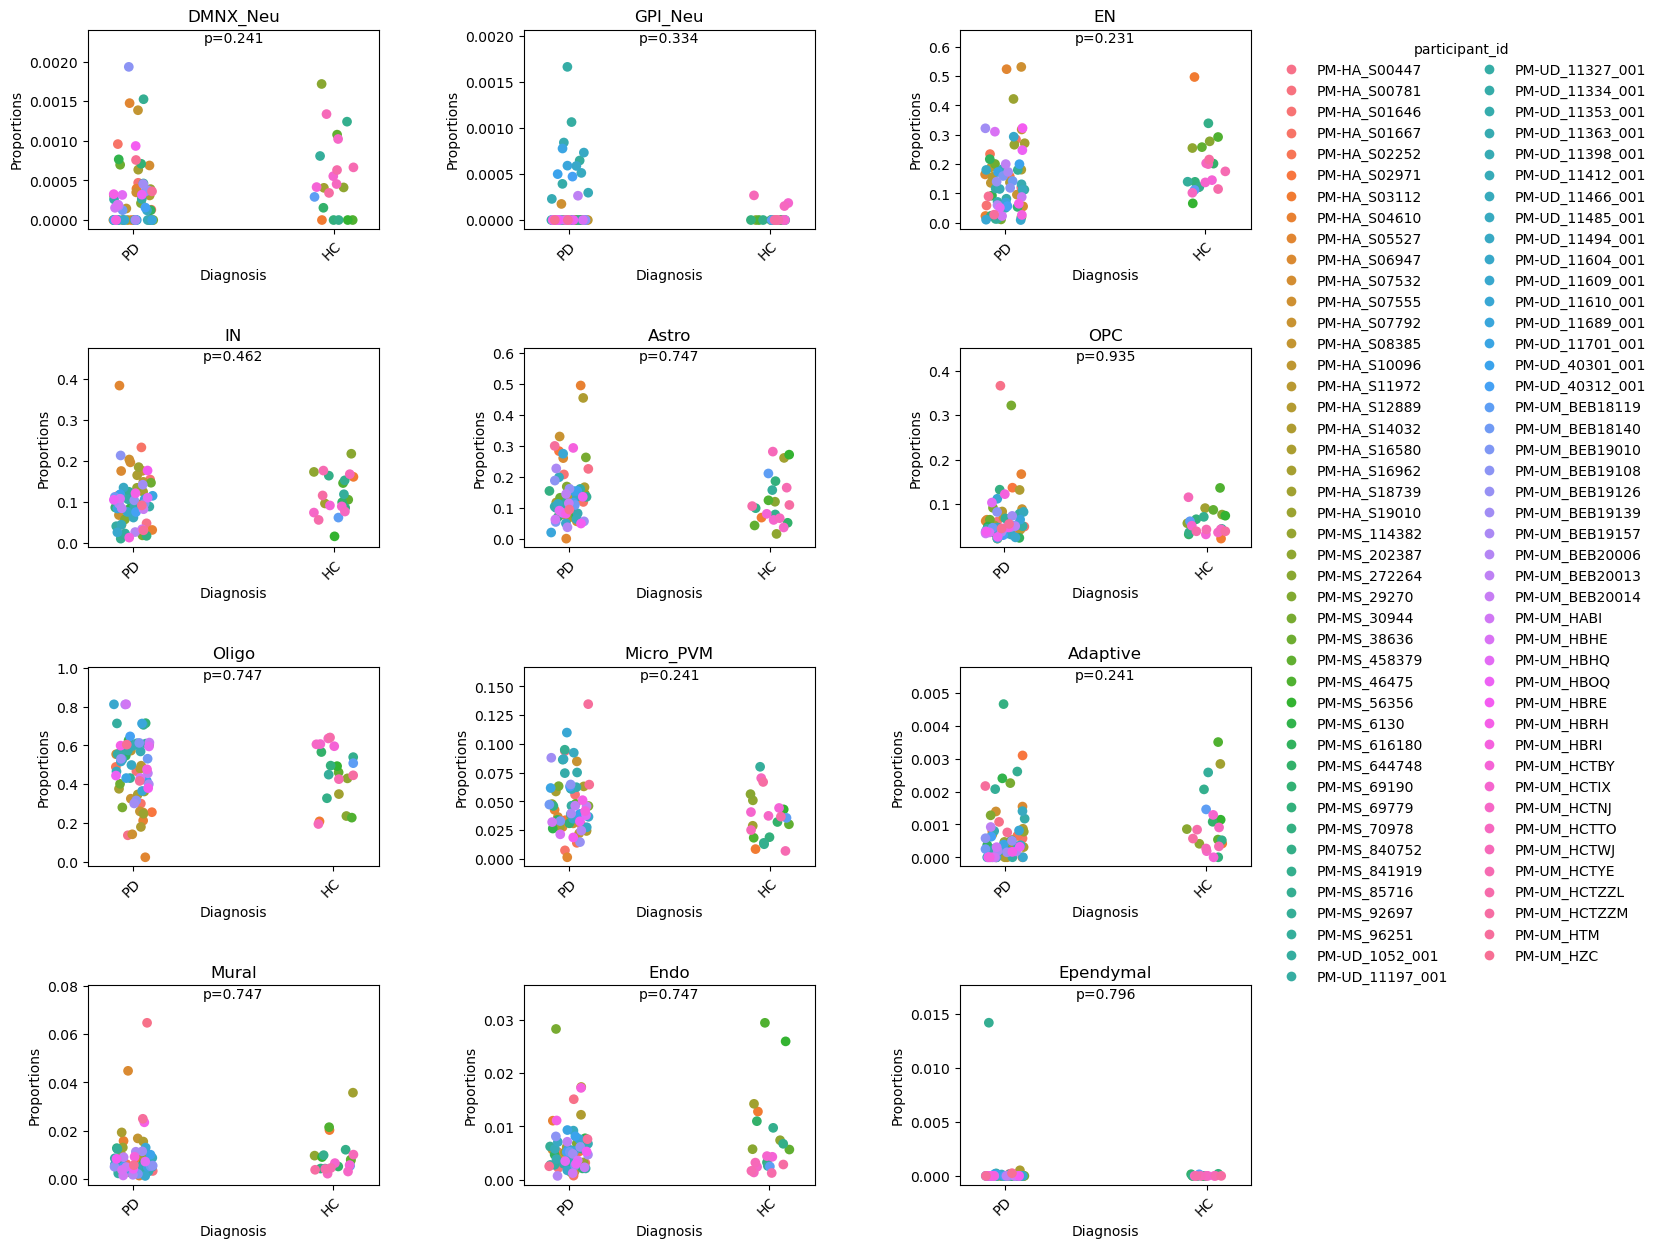

In [38]:
fig = out.plot() 

fig = plt.gcf() 

fig.set_size_inches(15, 15) 

for ax in fig.axes:
    ax.set_xlabel("Diagnosis") 


plt.tight_layout()

plt.savefig("97_main_clusters.pdf", bbox_inches="tight")

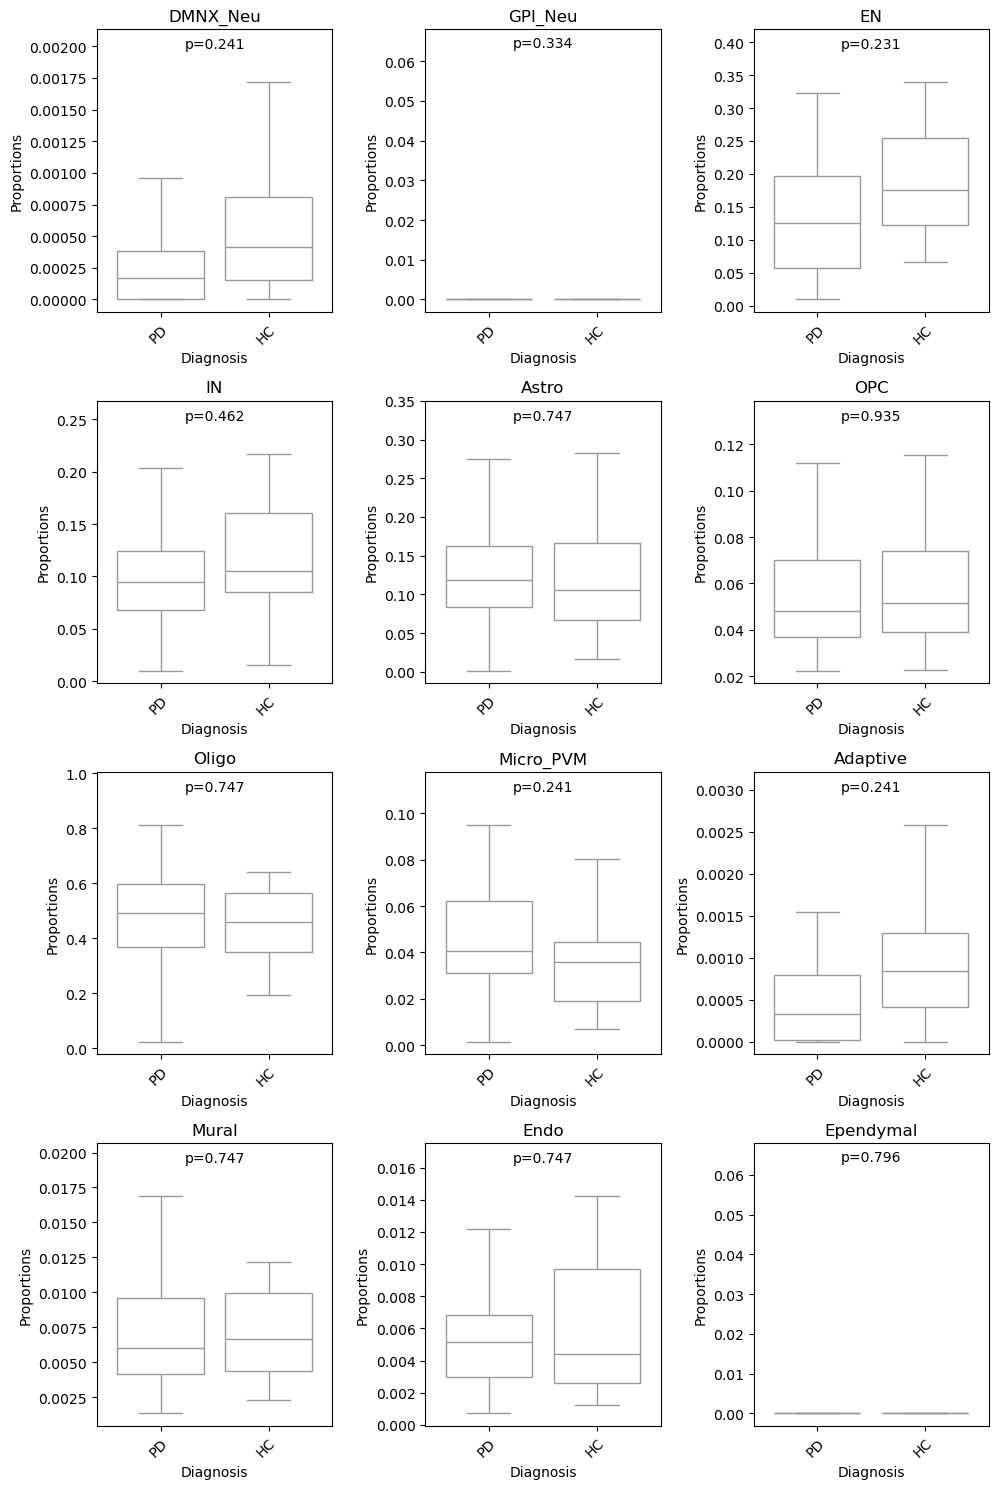

In [46]:
out.plot(kind="boxplot")

fig = plt.gcf() 

fig.set_size_inches(10, 15) 

for ax in fig.axes:
    ax.set_xlabel("Diagnosis") 


plt.tight_layout()

plt.savefig("main_clusters_boxplot.pdf", bbox_inches="tight")

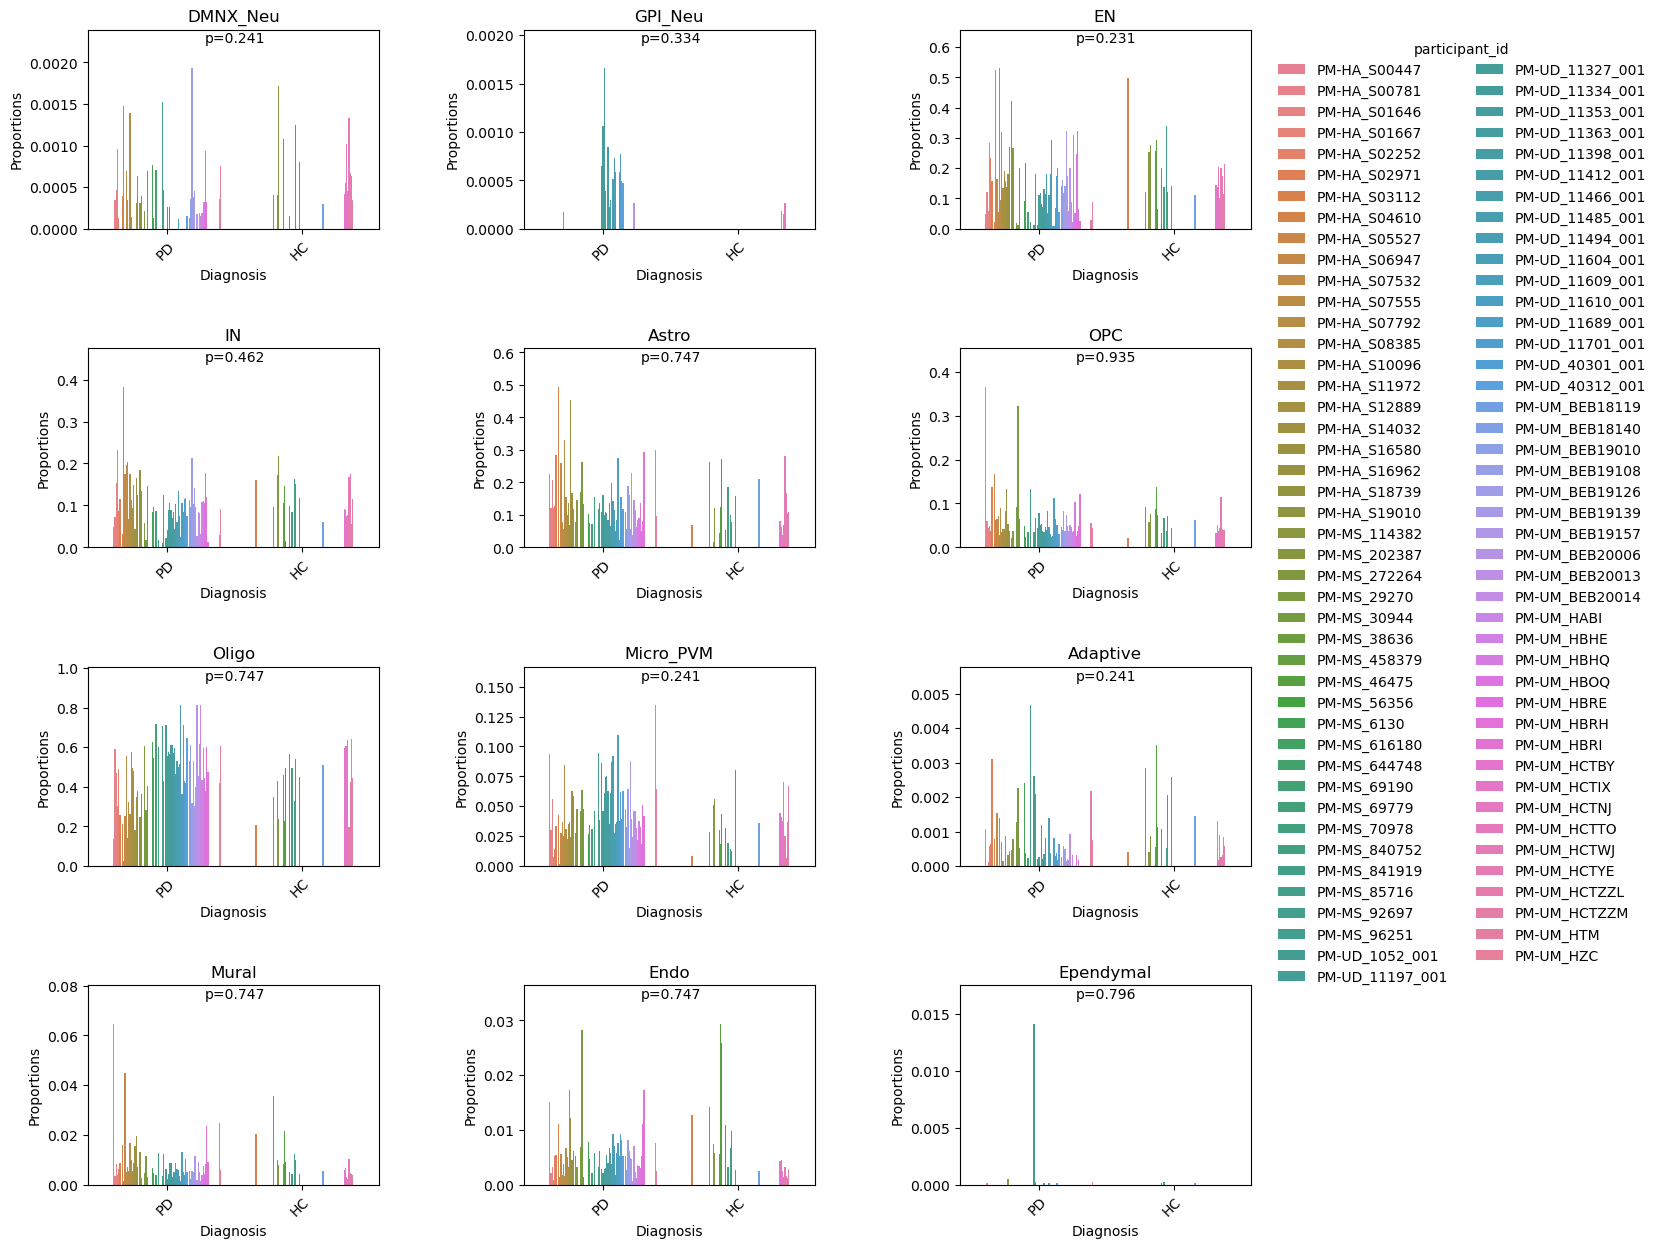

In [40]:
out.plot(kind="barplot")
fig = plt.gcf() 

fig.set_size_inches(15, 15) 

for ax in fig.axes:
    ax.set_xlabel("Diagnosis") 


plt.tight_layout()

plt.savefig("97_main_clusters_barplot.pdf", bbox_inches="tight")

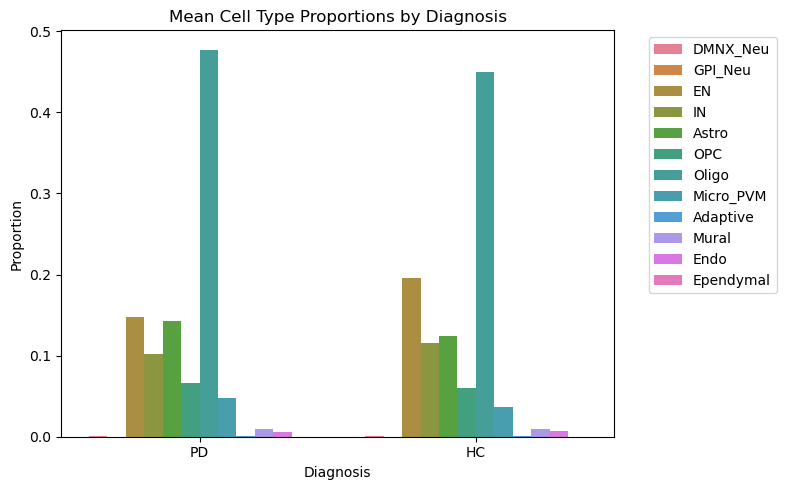

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Prepare the summary proportions
df = out.results.reset_index()

# Step 2: Subset and rename for plotting
df = df[["clusters", "mean_props_PD", "mean_props_HC"]]
df.columns = ["cell_type", "PD", "HC"]

# Step 3: Convert to long format for seaborn
df = df.melt(id_vars="cell_type", var_name="diagnosis", value_name="proportion")

# Step 4: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="diagnosis", y="proportion", hue="cell_type")
plt.title("Mean Cell Type Proportions by Diagnosis")
plt.ylabel("Proportion")
plt.xlabel("Diagnosis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()